# Classification Algorithms Comparison


************************* Algorithm Accuracy *************************
ANN: 0.957143 (0.065465)
RF: 0.957143 (0.065465)
KNN: 0.957143 (0.065465)
NB: 0.942857 (0.094761)
SVM: 0.957143 (0.065465)


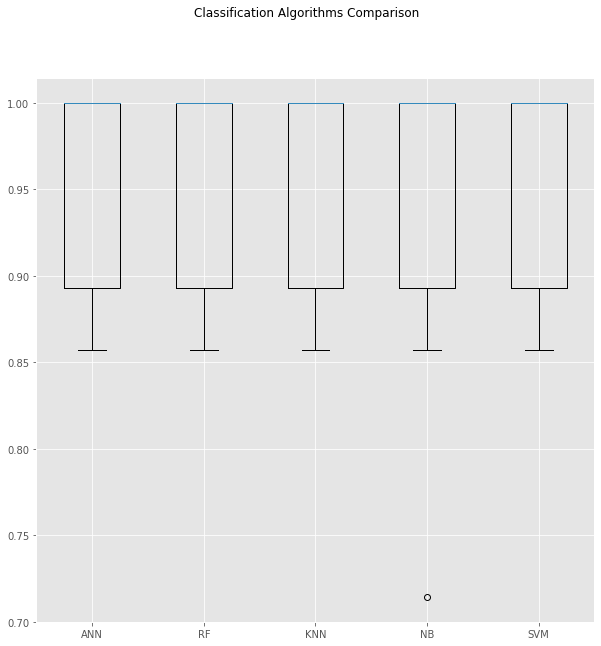

In [10]:
def comparealgo(): 
    print()
    print(format(' Algorithm Accuracy ','*^70'))    
    import warnings
    warnings.filterwarnings("ignore")
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.neural_network import MLPClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split     
    import pandas as pd

    plt.style.use('ggplot')
    # load datasets
    dataset = pd.read_csv('divorce-csv.csv')
    X = dataset.drop('Class', axis=1)
    y = dataset['Class']
    seed = 24
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
    kfold = model_selection.KFold(n_splits=15, random_state=seed)    
    # prepare models
    models = []
    models.append(('ANN',  MLPClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    # evaluate each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Classification Algorithms Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
comparealgo()